# Segundo Parcial 

Materia: Estadistica Aplicada 

Grupo: 042
                                                                                     
Por Ana Sofia Saucedo Garcia



In [31]:
#Librerias basicas

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

#Libreria especializada

from lifelines import CoxPHFitter, ExponentialFitter, WeibullFitter, LogNormalFitter, KaplanMeierFitter

# Libreria que requiere mi computadora para importar un archivo de internet
import ssl



In [32]:
# Paso extra para importar el archivo de internet 
ssl._create_default_https_context = ssl._create_unverified_context

In [33]:
banco_datos= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

### 1.Análisis exploratorio

#### a) Cuantas variables y cuantas observaciones tienen la base

In [76]:
banco_datos

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sin_cuenta,12,pago_algun_credito,mobiliario,1736,menor_100,4_a_7,3,mujer_no_soltera,NaN,...,bienes_raices,31,NaN,propia,1,obrero,1,0,1,1
996,menor_a_cero,30,pago_algun_credito,coche_usado,3857,menor_100,1_a_4,4,hombre_divorciado,NaN,...,seguro_vida,40,NaN,propia,1,administrativo,1,1,1,1
997,sin_cuenta,12,pago_algun_credito,TV,804,menor_100,mas_de_7,4,hombre_soltero,NaN,...,otro_tipo,38,NaN,propia,1,gobierno,1,0,1,1
998,menor_a_cero,45,pago_algun_credito,TV,1845,menor_100,1_a_4,4,hombre_soltero,NaN,...,sin_activos,23,NaN,prestada,1,gobierno,1,1,1,0


In [75]:
banco_datos.columns.size

21

In [78]:
banco_datos.index

RangeIndex(start=0, stop=1000, step=1)

In [70]:
banco_datos.count()

saldo_cuenta               1000
meses                      1000
historia_crediticia        1000
uso                        1000
cantidad                   1000
saldo_cuenta_ahorro         817
años_trabajando            1000
tasa_de_interes            1000
genero_estado_civil        1000
aval                         52
años_actual_domicilio      1000
activos                    1000
edad                       1000
planes_de_pago              186
casa                       1000
numero_creditos            1000
situacion_laboral          1000
dependientes_economicos    1000
telefono                   1000
extranjero                 1000
credito_pagado             1000
dtype: int64

En esta base de datos hay 21 variables las cuales nos dan informacion sobre cada prestamo que serian 1000 de distintos clientes sin embargo en las variables saldo_cuenta_ahorro, aval y planes de pago se observa que hay perdidas de datos 

#### b)Cuál es el monto promedio de los créditos otorgados por el banco

In [36]:
prom_credito= banco_datos['cantidad'].mean()

print("El monto promedio de los creditos otorgados por el banco es de : ",prom_credito,'euros')

El monto promedio de los creditos otorgados por el banco es de :  3271.258 euros


#### c) Cuál es  el  tiempo  promedio  que  se  tardaron  en  pagar  el  préstamo  los que pagaron el préstamo en su totalidad

Donde

 La variable "crédito_pagado" toma el valor de 1 si el cliente ha pagado completamente el préstamo y 0 si no lo ha hecho o aún no ha terminado de pagar.

In [37]:
pagado= banco_datos.query('credito_pagado==1')
tiempo_promedio_en_pagar=pagado['meses'].mean().round(3)

In [38]:
print('Por lo que el tiempo promedio que se tardaron en pagar el prestamo  los que pagaron el prestamo en su totalidad es de : ',tiempo_promedio_en_pagar, 'meses')

Por lo que el tiempo promedio que se tardaron en pagar el prestamo  los que pagaron el prestamo en su totalidad es de :  19.207 meses


#### d)Cuál es la tasa de interés promedio otorgada por el banco

In [39]:
prom_tasa= banco_datos['tasa_de_interes'].mean()

print("La tasa de interes promedio otorgada por el banco es de : ",prom_tasa)

La tasa de interes promedio otorgada por el banco es de :  2.973


#### e) Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron

In [60]:
prom_pagado= pagado[['tasa_de_interes','cantidad']].mean().round(3)

print("La tasa de interes promedio y el monto promedio de los que ya pagaron es de : ",prom_pagado[0],'y',prom_pagado[1],'respectivamente')

La tasa de interes promedio y el monto promedio de los que ya pagaron es de :  2.92 y 2985.457 respectivamente


#### f) Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado


In [61]:
no_pagado= banco_datos.query('credito_pagado==0')

prom_no_pagado= no_pagado[['tasa_de_interes','cantidad']].mean().round(3)

print("La tasa de interes promedio y el monto promedio de los que no han pagado es de : ",prom_no_pagado[0],'y',prom_no_pagado[1],'respectivamente')


La tasa de interes promedio y el monto promedio de los que no han pagado es de :  3.097 y 3938.127 respectivamente


### 2.Estime un modelo de Kaplan-meier 

In [42]:
#Estimador 
km= KaplanMeierFitter().fit(banco_datos['meses'], banco_datos['credito_pagado'])

#### a) Cuál es la mediana del tiempo y que significa

In [43]:
#Mediana
km.median_survival_time_

24.0

**La mediana del tiempo de supervivencia es de 24 meses, significa que la mitad de los clientes que han terminado de pagar estan por arriba o por abajo de 24 meses .**

#### b)es mayor/menor que el tiempo promedio del inciso 1c

Es mayor ya que en el inciso 1c nos dice que es de 19.207 meses el tiempo promedio que se tardaron en pagar los que pagaron el prestamo en su totalidad y aqui nos dice que la mitad de los clientes que han terminado de pagar el prestamo tardan arriba de 24 meses o abajo de 24 meses.

### 3.Determine si el riesgo de que el préstamo se pague en su totalidad es constante,creciente, decreciente, o tipo log-normal respecto al tiempo

In [44]:
# ExponentialFitter().fit(tiempo sup,censura/evento)
exp = ExponentialFitter().fit(banco_datos['meses'],banco_datos['credito_pagado'])

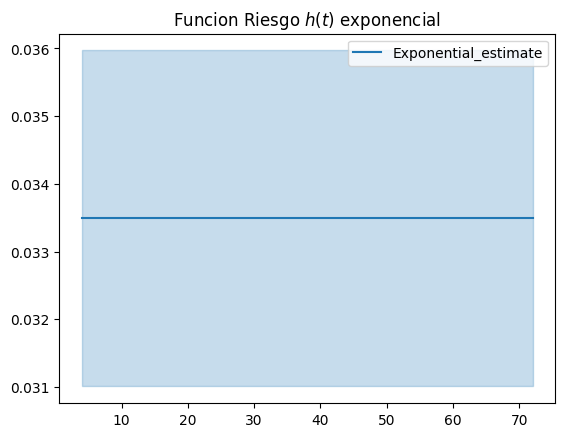

In [45]:
# graficar h(t)
exp.plot_hazard();
plt.title('Funcion Riesgo $h(t)$ exponencial');


In [46]:
# WeibullFitter().fit(tiempo sup,evento/censura)

weibull = WeibullFitter().fit(banco_datos['meses'],banco_datos['credito_pagado'])

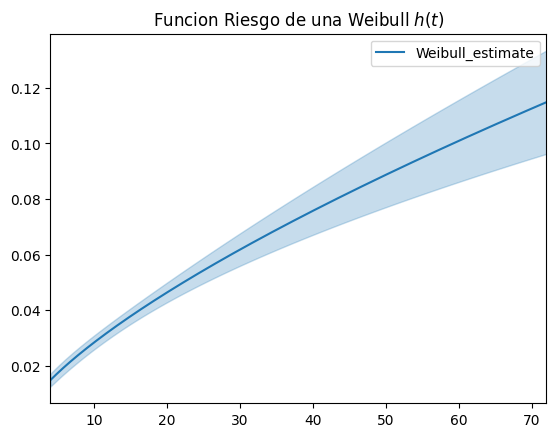

In [47]:
weibull.plot_hazard()
plt.title('Funcion Riesgo de una Weibull $h(t)$')
plt.xlim(min(banco_datos['meses']),max(banco_datos['meses']));

In [48]:
logn = LogNormalFitter().fit(banco_datos['meses'],banco_datos['credito_pagado'])

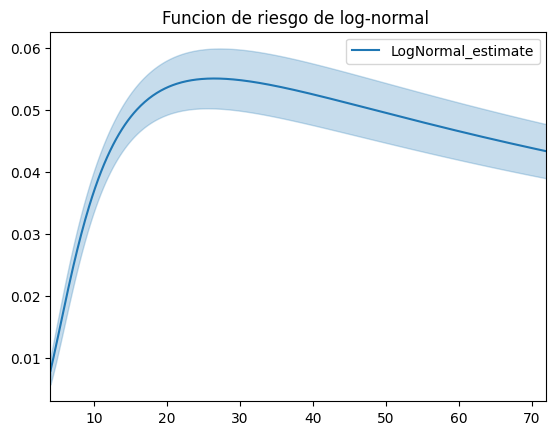

In [49]:
# Función de Riesgo log normal 

logn.plot_hazard()
plt.title('Funcion de riesgo de log-normal ')
plt.xlim(min(banco_datos['meses']),max(banco_datos['meses']));

¿ El tiempo de supervivencia es exponencial, weibull o log normal? 

In [50]:
print('Exponencial:', exp.AIC_.round(2) ,', Weibull:', weibull.AIC_.round(2), ', Log-Normal:', logn.AIC_.round(2))

Exponencial: 6157.19 , Weibull: 5900.98 , Log-Normal: 5813.75


De acuerdo con AIC el "mejor" modelo es Log-Normal, el riesgo de que el préstamo se pague en su totalidad es creciente en los primeros meses y comienza a ser decreciente a partir de los 30 meses

### 4.Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad

#### a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento

Las variables que seleccionare que creo que afectan el riesgo del evento seran :
saldo_cuenta_ahorro,casa,historia_crediticia,edad



#### b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo del evento y por qué

Variable saldo_cuenta_ahorro

Esta variable puede aumentar el riesgo del evento , es decir porque si si tiene saldo en su una cuenta de ahorro signfica que el riesgo de que el préstamo se pague en su totalidad para mi es mayor la probabilidad de que si pague , en cambio que no tenga una cuenta de ahorro para mi no es tan seguro de que pueda pagar el prestamo

Variable casa

Esta variable puede aumentar o disminuir el riesgo del evento si tiene casa propia o tiene casa prestada o renta , porque podemos pensar que una persona con casa propia puede tener mejores ingresos que alguien que no tiene casa propia. 

Variable historia_crediticia

Esta variable puede aumentar el riesgo del evento o disminuir dependiendo el historial credticio si si ha pagado o no pagado un credito 

Variable edad 

Esta variable puede aumentar el riesgo del evento en las personas mayores porque pueden tener mas experiencia en lo que es pagar un prestamo

Variable tasa de interes 

Esta variable puede disminuir el riesgo del evento si su tasa de interes es alta porque puede que la persona sea incapaz de poder seguir pagando el prestamo

Variable cantidad 

Esta variable puede disminuir el riesgo del evento si la cantidad del préstamo otorgado es muy alta porque es un prestamo que puede tardarse mas tiempo en pagar 

#### c) Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox

In [51]:
# Verificar que no haya missing values, en caso de haberlos decidir imputar o eliminar

# contar los valores perdidos / faltantes (missing)
var_afectan=banco_datos[['credito_pagado','meses','saldo_cuenta_ahorro','casa','historia_crediticia','edad','tasa_de_interes' ,'cantidad']]

var_afectan.isnull().sum()

credito_pagado           0
meses                    0
saldo_cuenta_ahorro    183
casa                     0
historia_crediticia      0
edad                     0
tasa_de_interes          0
cantidad                 0
dtype: int64

En la variable saldo_cuenta_ahorro hay valores perdidos por lo que eliminaremos los valores perdidos 

In [52]:
# Eliminar las observaciones con valores perdidos 
var_afectan= var_afectan.dropna()

In [53]:
var_afectan

,credito_pagado,meses,saldo_cuenta_ahorro,casa,historia_crediticia,edad,tasa_de_interes,cantidad
1,0,48,menor_100,propia,pago_algun_credito,22,2,5951
2,1,12,menor_100,propia,no_ha_pagado,49,2,2096
3,1,42,menor_100,prestada,pago_algun_credito,45,2,7882
4,0,24,menor_100,prestada,pago_retrasado,53,3,4870
6,1,24,500_a_1000,propia,pago_algun_credito,53,3,2835
...,...,...,...,...,...,...,...,...
995,1,12,menor_100,propia,pago_algun_credito,31,3,1736
996,1,30,menor_100,propia,pago_algun_credito,40,4,3857
997,1,12,menor_100,propia,pago_algun_credito,38,4,804
998,0,45,menor_100,prestada,pago_algun_credito,23,4,1845


In [54]:
# verificar que las variables son numericas
var_afectan.dtypes

credito_pagado          int64
meses                   int64
saldo_cuenta_ahorro    object
casa                   object
historia_crediticia    object
edad                    int64
tasa_de_interes         int64
cantidad                int64
dtype: object

Observamos que no todas las variables son numericas 

In [55]:
# Convertimos en dummies las variables categoricas 

var_dummies =pd.get_dummies(var_afectan,columns=['saldo_cuenta_ahorro','casa','historia_crediticia'])
var_dummies


,credito_pagado,meses,edad,tasa_de_interes,cantidad,saldo_cuenta_ahorro_100_a_500,saldo_cuenta_ahorro_500_a_1000,saldo_cuenta_ahorro_mas_de_1000,saldo_cuenta_ahorro_menor_100,casa_prestada,casa_propia,casa_renta,historia_crediticia_no_ha_pagado,historia_crediticia_pago_algun_credito,historia_crediticia_pago_retrasado,historia_crediticia_pago_todos,historia_crediticia_sin_creditos
1,0,48,22,2,5951,0,0,0,1,0,1,0,0,1,0,0,0
2,1,12,49,2,2096,0,0,0,1,0,1,0,1,0,0,0,0
3,1,42,45,2,7882,0,0,0,1,1,0,0,0,1,0,0,0
4,0,24,53,3,4870,0,0,0,1,1,0,0,0,0,1,0,0
6,1,24,53,3,2835,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,12,31,3,1736,0,0,0,1,0,1,0,0,1,0,0,0
996,1,30,40,4,3857,0,0,0,1,0,1,0,0,1,0,0,0
997,1,12,38,4,804,0,0,0,1,0,1,0,0,1,0,0,0
998,0,45,23,4,1845,0,0,0,1,1,0,0,0,1,0,0,0


In [56]:
#  Dejamos una dummie afuera
var_dummies= var_dummies.drop(['saldo_cuenta_ahorro_menor_100','casa_prestada','historia_crediticia_sin_creditos'],axis=1)

#### d) Estima un modelo de cox con las variables elegidas e interpreta los coeficientes.

In [57]:
# estimar el modelo 
cph1 = CoxPHFitter()
cph1.fit(var_dummies,'meses','credito_pagado')

<lifelines.CoxPHFitter: fitted with 817 total observations, 268 right-censored observations>

In [58]:
cph1.print_summary()

<lifelines.CoxPHFitter: fitted with 817 total observations, 268 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 817
number of events observed = 549
   partial log-likelihood = -3067.98
         time fit was run = 2023-10-05 19:56:01 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                      
edad                                     0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
tasa_de_interes                         -0.43       0.65       0.04            -0.52            -0.35                 0.60                 0.70
cantidad                                -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
saldo_cuenta_ahorro_100_a_500            0.09       1.09       0.13            -0.17             0.35                 0.84                 1.42
saldo_cuenta_ahorro_500_a_1000           0.20       1.22       0.15            -0.10             0.49                 0.91                 1.63
saldo_cuenta_ahorro_mas_de_1000          0.27       1.31       0.17            -0.06             0.60                 0.95                 1.82
casa_propia                              0.39       1.48       0.16             0.07             0.71                 1.07                 2.04
casa_renta                               0.29       1.33       0.20            -0.10             0.67                 0.91                 1.96
historia_crediticia_no_ha_pagado         1.01       2.75       0.30             0.42             1.60                 1.53                 4.97
historia_crediticia_pago_algun_credito   0.67       1.95       0.30             0.08             1.25                 1.09                 3.49
historia_crediticia_pago_retrasado       0.46       1.58       0.33            -0.18             1.10                 0.83                 2.99
historia_crediticia_pago_todos          -0.09       0.91       0.38            -0.84             0.66                 0.43                 1.94

                                         cmp to      z      p   -log2(p)
covariate                                                               
edad                                       0.00   3.35 <0.005      10.27
tasa_de_interes                            0.00 -10.49 <0.005      83.08
cantidad                                   0.00 -13.80 <0.005     141.44
saldo_cuenta_ahorro_100_a_500              0.00   0.68   0.50       1.01
saldo_cuenta_ahorro_500_a_1000             0.00   1.31   0.19       2.40
saldo_cuenta_ahorro_mas_de_1000            0.00   1.63   0.10       3.27
casa_propia                                0.00   2.40   0.02       5.91
casa_renta                                 0.00   1.45   0.15       2.77
historia_crediticia_no_ha_pagado           0.00   3.36 <0.005      10.34
historia_crediticia_pago_algun_credito     0.00   2.24   0.03       5.30
historia_crediticia_pago_retrasado         0.00   1.40   0.16       2.62
historia_crediticia_pago_todos             0.00  -0.23   0.82       0.29
---
Concordance = 0.78
Partial AIC = 6159.95
log-likelihood ratio test = 396.47 on 12 df
-log2(p) of ll-ratio test = 254.71

In [59]:
cph1.hazard_ratios_

covariate
edad                                      1.013497
tasa_de_interes                           0.647633
cantidad                                  0.999599
saldo_cuenta_ahorro_100_a_500             1.094395
saldo_cuenta_ahorro_500_a_1000            1.215721
saldo_cuenta_ahorro_mas_de_1000           1.311307
casa_propia                               1.478199
casa_renta                                1.330761
historia_crediticia_no_ha_pagado          2.752374
historia_crediticia_pago_algun_credito    1.945314
historia_crediticia_pago_retrasado        1.577656
historia_crediticia_pago_todos            0.914438
Name: exp(coef), dtype: float64

#### Interpretación de cada uno de los coeficientes 

Notas .
 
 Rechazamos $H_0$ si p-value < $alpha$
 
 Cuando coef(-) , entonces exp(coef)< 1 ,es decir , la variable influye de manera negativa (disminuye) ; (1-exp(coef))

  Cuando coef(+) , entonces exp(coef) > 1 ,es decir , la variable influye de manera positiva (aumenta) ; (exp(coef)-1)



Variable edad

Rechazo $H_0$ : Su p-value es < 0.005 , esto nos dice que edad tiene efecto significativo sobre el riesgo de que el préstamo se pague en su totalidad , entonces por cada año de edad del cliente el riesgo de que el prestamo se pague en su totalidad aumenta 1% 

Variable tasa_de_interes 

Rechazo $H_0$ : Su p-value es < 0.005 , esto nos dice que la tasa de interes tiene efecto significativo sobre el riesgo de que el préstamo se pague en su totalidad , entonces la tasa de interes disminuye 35% el riesgo de que el prestamo se pague en su totalidad 

Variable cantidad

Rechazo $H_0$ : Su p-value es < 0.005 , esto nos dice que cantidad tiene efecto significativo sobre el riesgo de que el préstamo se pague en su totalidad , entonces por cada monto del préstamo otorgado en euros el riesgo de que el prestamo se pague en su totalidad disminuye .04%

Variable saldo_cuenta_ahorro_100_a_500	

No Rechazo $H_0$ : Su p-value es 0.50 , entonces tener saldo en una cuenta ahorro de 100 a 500 no tiene efecto significativo 

Variable saldo_cuenta_ahorro_500_a_1000

No Rechazo $H_0$ : Su p-value es 0.19 , entonces tener saldo en una cuenta ahorro de 500 a 1000 no tiene efecto significativo 

Variable saldo_cuenta_ahorro_mas_de_1000

No Rechazo $H_0$ : Su p-value es 0.10 , entonces tener mas de 1000 de saldo en una cuenta de ahorro no tiene efecto significativo 

Variable casa_propia

Rechazo $H_0$ : Su p-value es 0.02 , esto nos dice que tener casa propia tiene efecto significativo sobre el riesgo de que el préstamo se pague en su totalidad , entonces el riesgo aumenta un 48% si el cliente tiene casa propia con respecto a los que tienen casa prestada 


Variable casa_renta

No Rechazo $H_0$ : Su p-value es 0.15 , esto nos dice que tener casa rentada no tiene efecto significativo sobre el riesgo 

Variable historia_crediticia_no_ha_pagado

Rechazo $H_0$ : Su p-value es <0.005 , esto nos dice que el historial crediticio de no pagar tiene efecto significativo sobre el riesgo de que el préstamo se pague en su totalidad , entonces el riesgo aumenta 1.75 veces si no ha pagado con respecto a los que no tienen creditos en su historia crediticia


Variable historia_crediticia_pago_algun_credito

Rechazo $H_0$ : Su p-value es 0.03 , esto nos dice que el historial crediticio de pagar algun credito tiene efecto significativo sobre el riesgo de que el préstamo se pague en su totalidad , entonces el riesgo de que se pague el prestamo en su totalidad si ha pagado algun credito aumenta un 95% con respecto a los que no tienen creditos en su historia crediticia


Variable historia_crediticia_pago_retrasado

No Rechazo $H_0$ : Su p-value es 0.16 , esto nos dice que el historial crediticio de pagar retrasado no tiene efecto significativo sobre el riesgo 

Variable historia_crediticia_pago_todos

No Rechazo $H_0$ : Su p-value es 0.82 , esto nos dice que el historial crediticio de pagar todos no tiene efecto significativo sobre el riesgo 

### 5. Con  base  en  los  cálculos  realizados,  redacta  un  comentario integral de  por  lo menos  250 palabras que  resuma  el  análisis,  reflexiones  y  recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión

Con la base de datos proporcionada por el banco, que contiene información sobre los créditos y préstamos otorgados a distintos clientes pudimos aplicar la estadistica que se necesita en nuestros datos para revisar las politicas de otorgamiento de préstamos del banco y así análisar mas los factores que influyen sobre el riesgo de que el prestamo se pague en su totalidad . 

Con el Análisis exploratorio se obtuvo que los clientes que ya pagaron el prestamo en su totalidad su tasa de interes promedio fue de 2.92 por ciento y el monto promedio fue de 2,985.457 euros mientras que los clientes que aun no terminan de pagar el prestamo , su tasa de interes promedio y el monto promedio fue de 3.097 y 3938.127 euros respectivamente. Por lo que se puede conlcuir de aqui que la tasa de interes y el monto estan influyendo en que se pague el prestamo por lo que si la tasa de interes fuera menor y el monto del prestamo otorgado fuera una cantidad mas pequeña los clientes terminarian de pagar en su totalidad el prestamo. 

Con el modelo de Kaplan- Meier se obtuvo la mediana del tiempo de supervivencia que fue de 24 meses , donde con esto se refiere al tiempo que transcurre desde que se hace el prestamo hasta que ocurre el evento que en este caso es que se paga el prestamo en su totalidad por lo que la mitad de los clientes que han terminado de pagar tardan arriba de 24 meses y la otra mitad por debajo de 24 meses. 

Se determino que su tiempo de supervivencia es Log-Normal que fue el modelo que supusimos como el "mejor" , donde pudimos observar el riesgo de que el préstamo se pague en su totalidad es creciente en los primeros meses y comienza a ser decreciente a partir de los 30 meses , por lo que de aqui podriamos decir que superior a los 30 meses hay mas riesgo de que el prestamo no se pague en su totalidad

Por ultimo estimando un modelo de cox con las variables cantidad , tasa de interes , saldo_cuenta_ahorro,casa,historia_crediticia y edad se obtuvo la informacion para saber si estas variables son significativas en el riesgo de que se pague el prestamo en su totalidad y asi interpretar sus coeficientes para darnos una idea de cuanto y como influyen , por lo que con esto se puede recomendar al banco sobre la politica de otorgamiento de creditos que entre mas grande sea la persona de edad , tenga casa propia y no sea prestada esto aumenta el riesgo de que si se pague el prestamo en su totalidad , y que seria bueno revisar un poco mas el historial creditico de los clientes.